In [2]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:

file = uproot.open("dati/postFrascati/2p5/Hits.root")
tree = file["Hits"]

data = tree.arrays(library="pd")

Bremm LOr intensity

In [3]:
data1 = data[(data['z'] > 0)]   
data2 = data[(data['z'] < 0)]

print(np.shape(data1))
print(np.shape(data2))

(10699, 12)
(10969, 12)


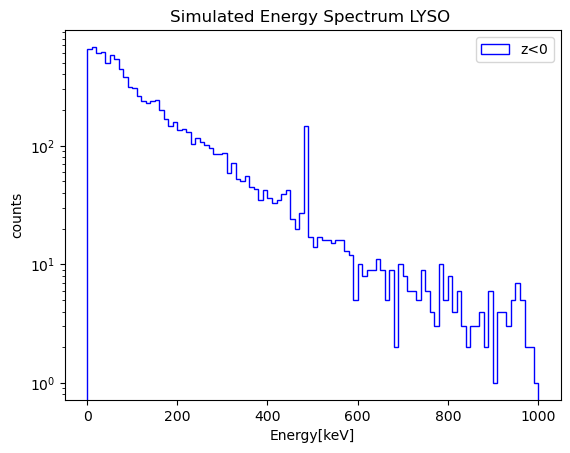

In [4]:
#plt.hist(data1['EDepDet'], bins=100, histtype='step', color='r', label='z>0',range=(0,1))

plt.hist(np.multiply(data2['EDepDet'],1000), bins=100, histtype='step', color='b', label='z<0',range=(0,1000))
#plt.legend()
plt.yscale('log')
plt.xlabel('Energy[keV]')
plt.ylabel('counts')
plt.yscale('log')
plt.title('Simulated Energy Spectrum LYSO ')
plt.legend()
plt.show()
plt.show()


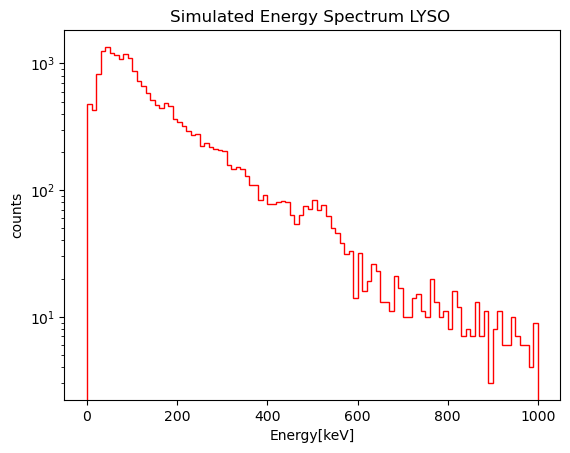

In [4]:

plt.hist(np.random.normal((np.multiply(data['EDepDet'],1000)),0.05*(np.multiply(data['EDepDet'],1000))), bins=100, histtype='step', color='red',range=(0,1000))
#plt.legend()
plt.yscale('log')
plt.xlabel('Energy[keV]')
plt.ylabel('counts')
plt.yscale('log')
plt.title('Simulated Energy Spectrum LYSO ')
plt.show()
plt.show()

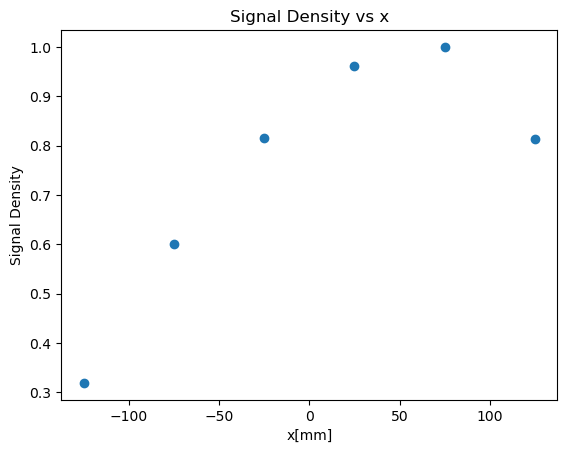

In [82]:
x=[-125,-75,-25,25,75,125]
sig=[4193,7894,10708,12633,13142,10699]
sig=np.array(sig)/np.max(sig)

plt.scatter(x,sig)
plt.xlabel('x[mm]')
plt.ylabel('Signal Density')
plt.title('Signal Density vs x')
plt.show()


Demonstration

(89397,)


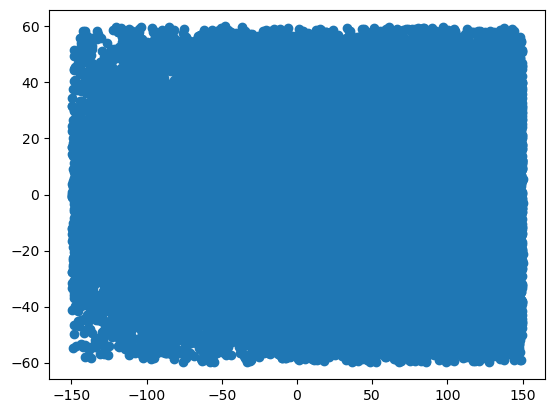

In [12]:
csv_file_path3 = 'gamma_entering_preproc80.csv'


df_gamma = pd.read_csv(csv_file_path3, delimiter=',', header=1, names=['Energy', 'X', 'Y', 'Z','pX', 'pY', 'pZ','theta','evt'])

print(np.shape(df_gamma['X']))


plt.scatter(df_gamma['X'], df_gamma['Y'])
#plt.xlim(-150, 150)
#plt.ylim(-100, 100)
plt.show()

In [3]:

mask = ~np.isclose(df_gamma['Energy'], 510.99, atol=0.1 * 510.99)
df_gamma_filtered = df_gamma[mask]



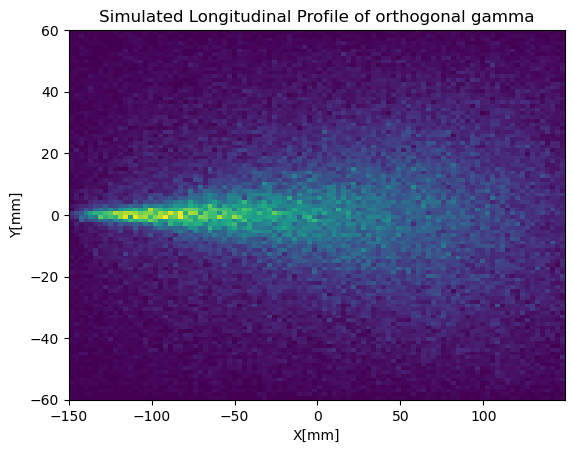

In [13]:
plt.hist2d(df_gamma['X'], df_gamma['Y'], bins=(100,100), cmap='viridis',range=[[-150, 149], [-60, 60]])
plt.xlabel('X[mm]')
plt.ylabel('Y[mm]')
plt.title('Simulated Longitudinal Profile of orthogonal gamma')
plt.show()

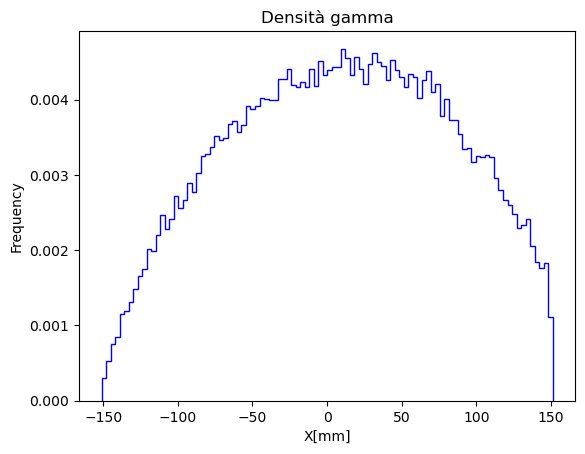

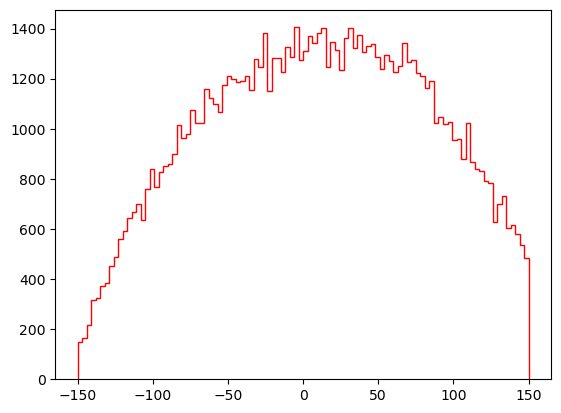

In [14]:
hist2d, x_edges, y_edges = np.histogram2d(df_gamma['X'], df_gamma['Y'], bins=(100000, 1), range=[[-151, 151], [-100, 100]])

slice_index = 0

# Extract the slice from the 2D histogram
hist_slice = hist2d[:, slice_index]

hist_slice = hist_slice / np.sum(hist_slice)    


bin_centers_x = (x_edges[:-1] + x_edges[1:]) / 2

plt.hist(bin_centers_x, weights=hist_slice, color='blue', bins=100,histtype='step',density=True)


# Add labels and title
plt.xlabel('X[mm]')
plt.ylabel('Frequency')
plt.title('Densità gamma')
plt.show()

sampled_value = np.random.choice(bin_centers_x, p=hist_slice,size=100000)
sampled_value=np.sort(sampled_value, axis=None)


np.save('gamma_sampled.npy', sampled_value)

plt.hist(sampled_value, histtype='step', color='r',bins=100)
# Show the plot
plt.show()





Angolare

Text(0.5, 1.0, 'Simulated Exit angle for gammas ')

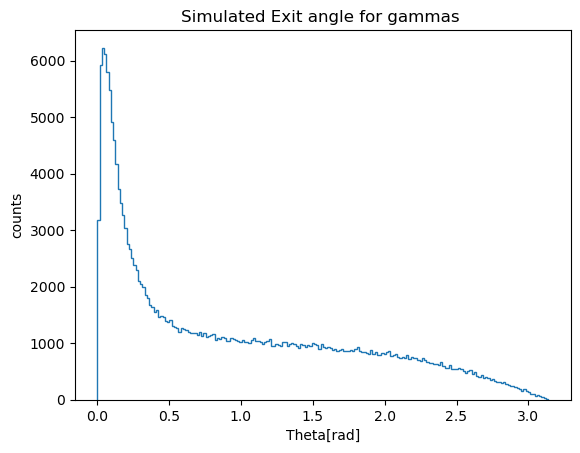

In [9]:
theta=np.arccos(df_gamma['pX']/np.sqrt(df_gamma['pX']**2+df_gamma['pY']**2+df_gamma['pZ']**2))

plt.hist(theta, bins=200, histtype='step')
plt.xlabel('Theta[rad]')
plt.ylabel('counts')
plt.title('Simulated Exit angle for gammas ') 

(89398,)


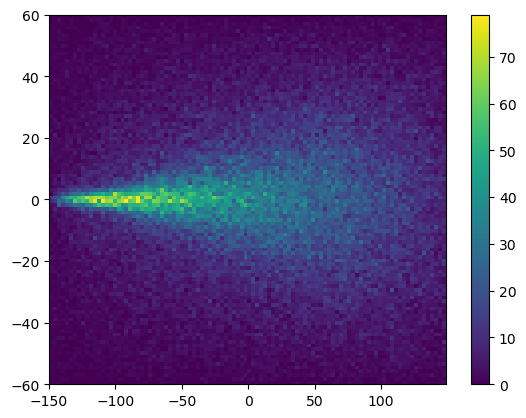

In [10]:
df_gamma['theta']=theta

df_gamma=df_gamma[np.isclose(df_gamma['theta'],1.5,atol=0.5*1.5)]
df_gamma.to_csv('gamma_entering_preproc80.csv', index=False)


print(np.shape(df_gamma['X']))


plt.hist2d(df_gamma['X'], df_gamma['Y'], bins=(100,100), cmap='viridis',range=[[-150, 149], [-60, 60]])
plt.colorbar()
plt.show()

In [15]:

file = uproot.open("dati/postFrascati/Hits80.root")
tree = file["Hits"]

data = tree.arrays(library="pd")

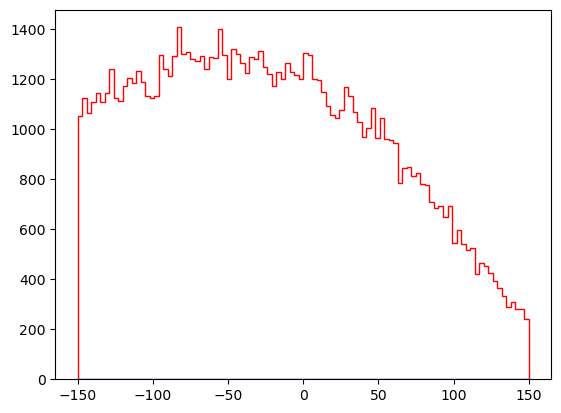

In [16]:


edep= data['EDep']

xloc= data['xloc'] 

hist, x_edges=np.histogram(xloc,weights=edep, bins=10000)

bin_centers = (x_edges[:-1] + x_edges[1:]) / 2

hist=hist/np.sum(hist)  

plt.hist(bin_centers, weights=hist, color='blue', bins=100,histtype='step')

sampled_value_dose = np.random.choice(bin_centers, p=hist,size=100000)

sampled_value_dose=np.sort(sampled_value_dose, axis=None)

np.save('dose_sampled.npy', sampled_value_dose)

plt.hist(sampled_value_dose,bins=100, histtype='step', color='r')
# Show the plot
plt.show()



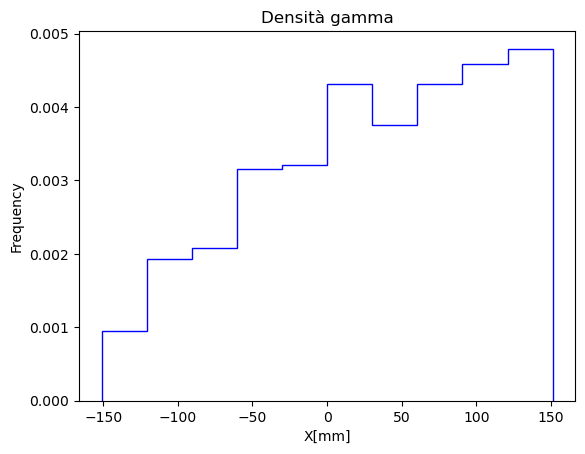

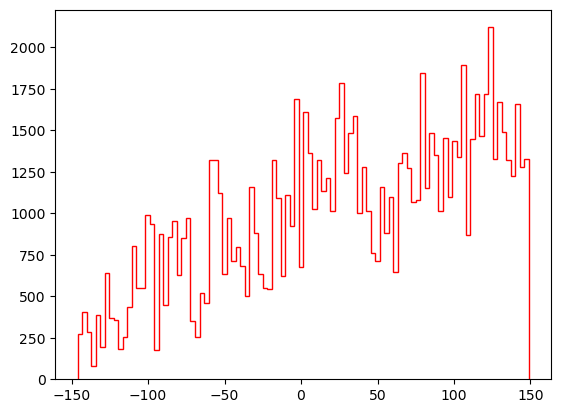

In [63]:
csv_file_path4 = 'dati/preFrascati/cilindrofan/150mev/coll/C11_entering_particles.csv'
df_C11 = pd.read_csv(csv_file_path4, delimiter=',', header=1, names=['E','X', 'Y', 'Z','evt'])

hist2d, x_edges, y_edges = np.histogram2d(df_C11['X'], df_C11['Y'], bins=(100000, 1), range=[[-151, 151], [-100, 100]])

slice_index = 0

# Extract the slice from the 2D histogram
hist_slice = hist2d[:, slice_index]

hist_slice = hist_slice / np.sum(hist_slice)    


bin_centers_x = (x_edges[:-1] + x_edges[1:]) / 2

plt.hist(bin_centers_x, weights=hist_slice, color='blue', bins=10,histtype='step',density=True)


# Add labels and title
plt.xlabel('X[mm]')
plt.ylabel('Frequency')
plt.title('Densità gamma')
plt.show()

sampled_value = np.random.choice(bin_centers_x, p=hist_slice,size=100000)
sampled_value=np.sort(sampled_value, axis=None)


np.save('c11_sampled.npy', sampled_value)

plt.hist(sampled_value, histtype='step', color='r',bins=100)
# Show the plot
plt.show()

